<a href="https://colab.research.google.com/github/pratikjori20/Appliance-Energy-Prediction/blob/main/Individual_capstone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <B> Appliance Energy Prediction
Data-driven prediction of energy use of appliances
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).

In [65]:
# Import all necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, model_selection, metrics
from sklearn import datasets, linear_model, metrics
from sklearn import ensemble

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
# mount the drive on colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# read the data
path = "/content/drive/MyDrive/Copy of data_application_energy.csv"
df = pd.read_csv(path, parse_dates=['date'])

In [4]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [5]:
df.shape

(19735, 29)

In [6]:
df_1 = df
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [7]:
# Set the date index
df = df.set_index('date')

In [8]:
df['Month'] = df.index.month
df['Weekday'] = df.index.weekday
df['Day'] = df.index.day
df['Hour'] = df.index.hour
df['Week'] = df.index.week

In [9]:
df.head(10)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,Month,Weekday,Day,Hour,Week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,45.566667,...,7.000000,63.000000,5.300000,13.275433,13.275433,1,0,11,17,2
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,45.992500,...,6.666667,59.166667,5.200000,18.606195,18.606195,1,0,11,17,2
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,45.890000,...,6.333333,55.333333,5.100000,28.642668,28.642668,1,0,11,17,2
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,45.723333,...,6.000000,51.500000,5.000000,45.410389,45.410389,1,0,11,17,2
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,45.530000,...,5.666667,47.666667,4.900000,10.084097,10.084097,1,0,11,17,2
2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,45.730000,...,5.333333,43.833333,4.800000,44.919484,44.919484,1,0,11,17,2
2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,45.790000,...,5.000000,40.000000,4.700000,47.233763,47.233763,1,0,11,18,2
2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,45.863333,...,5.166667,40.000000,4.683333,33.039890,33.039890,1,0,11,18,2
2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,45.790000,...,5.333333,40.000000,4.666667,31.455702,31.455702,1,0,11,18,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [11]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,Month,Weekday,Day,Hour,Week
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,4.039752,38.330834,3.760707,24.988033,24.988033,3.101647,2.977249,16.057411,11.502002,11.393615
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.451221,11.794719,4.194648,14.496634,14.496634,1.339200,1.985617,8.450998,6.921953,5.657985
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,0.000000,1.000000,-6.600000,0.005322,0.005322,1.000000,0.000000,1.000000,0.000000,2.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,2.000000,29.000000,0.900000,12.497889,12.497889,2.000000,1.000000,9.000000,6.000000,6.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,3.666667,40.000000,3.433333,24.897653,24.897653,3.000000,3.000000,16.000000,12.000000,11.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,5.500000,40.000000,6.566667,37.583769,37.583769,4.000000,5.000000,23.000000,17.000000,16.000000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,14.000000,66.000000,15.500000,49.996530,49.996530,5.000000,6.000000,31.000000,23.000000,21.000000


In [12]:
df.shape

(19735, 33)

In [13]:
# Checking for null values

df.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
Month          0
Weekday        0
Day            0
Hour           0
Week           0
dtype: int64

In [ ]:
# Data visualisation

# understanding the timeseries variation of the applaince energy consumption

visData = go.Scatter(x = df_1.date, mode = 'lines', y = df_1.Appliances)
layout = go.Layout(title = 'Appliance energy consumption measurement', xaxis = dict(title='Date'), yaxis = dict(title='Wh'))
fig = go.Figure(data = [visData], layout=layout)
iplot(fig)

In [15]:
# adding column to mark  weekdays-0 and weekends-1 for time series evalution
df_1['WEEKDAY'] = ((pd.to_datetime(df_1['date']).dt.dayofweek)// 5 == 1).astype(float)
df_1['WEEKDAY'].value_counts()

0.0    14263
1.0     5472
Name: WEEKDAY, dtype: int64

In [ ]:
# find the rows of weekday
a_weekday = df_1[df_1['WEEKDAY'] == 0]
# understanding the timeseries variation of the appliances energy consumption
visData = go.Scatter(x = a_weekday.date, mode = "lines", y = a_weekday.Appliances)
layout = go.Layout(title = 'Appliance Energy Consumption Measurment on Weekdays', xaxis = dict(title='Date'), yaxis = dict(title='Wh'))
fig = go.Figure(data = [visData], layout=layout)
iplot(fig)

In [ ]:
a_weekend = df_1[df_1['WEEKDAY'] == 1]
# understanding the timeseries variation of the appliances energy consumption
visData = go.Scatter(x = a_weekend.date, mode = "lines", y = a_weekend.Appliances)
layout = go.Layout(title = 'Appliance Energy Consumption Measurment on Weekends', xaxis = dict(title='Date'), yaxis = dict(title='Wh'))
fig = go.Figure(data = [visData], layout=layout)
iplot(fig)

In [18]:
# function to be used for plotting
def daily(x, energy_df=df):
  return energy_df.groupby('Weekday')[x].mean()

def hourly(x, energy_df=df):
  return energy_df.groupby('Hour')[x].mean()

def monthly_daily(x, energy_df=df):
  by_day = energy_df.pivot_table(index='Weekday', columns=['Month'], values=x, aggfunc='mean')
  return round(by_day, ndigits=2)

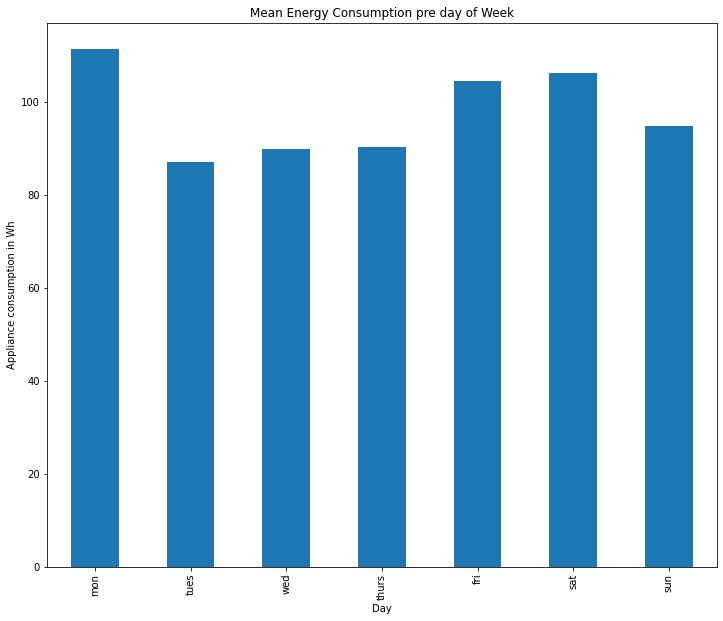

In [19]:
# plot of mean energy consumption per day of week
daily('Appliances').plot(kind = 'bar', figsize = (12,10))
ticks = list(range(0,7,1))
labels = "mon tues wed thurs fri sat sun".split()
plt.xlabel('Day')
plt.ylabel('Appliance consumption in Wh')
plt.title('Mean Energy Consumption pre day of Week')
plt.xticks(ticks, labels);

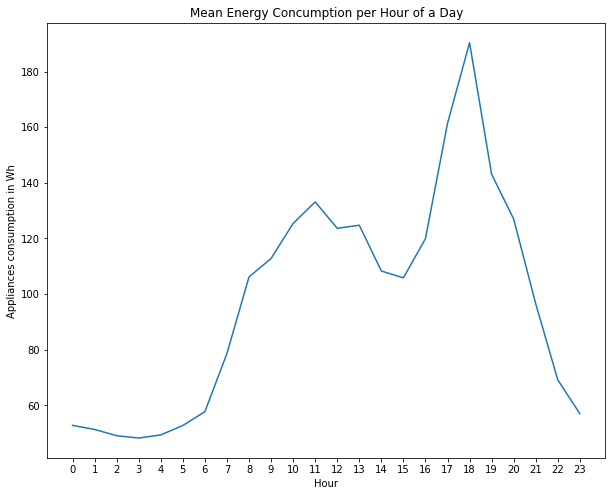

In [20]:
# mean energy consumption per hour of the day
hourly('Appliances').plot(figsize = (10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0,24,1))
plt.title('Mean Energy Concumption per Hour of a Day')
plt.xticks(ticks);

In [21]:
df_1.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'WEEKDAY'],
      dtype='object')

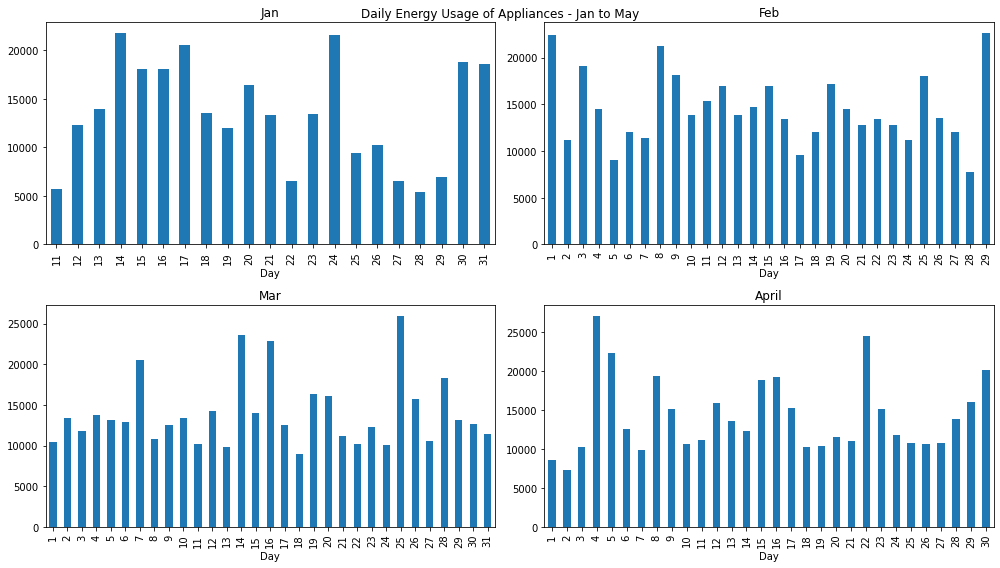

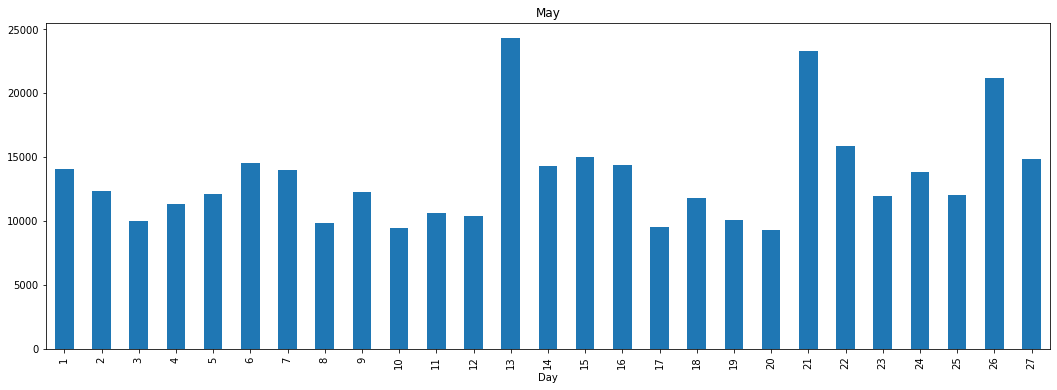

In [22]:
# daily energy usages of appliances from jan-may
fig, ax = plt.subplots(2,2, figsize=(14,8))
ax = ax.flatten()
months =['Jan', 'Feb', 'Mar', 'April']
for i in range(1,5):
  df.query(f"Month == {i}")[['Day','Appliances']].groupby('Day')['Appliances'].sum().plot.bar(ax=ax[i-1], title = months[i-1])

plt.suptitle('Daily Energy Usage of Appliances - Jan to May')
plt.tight_layout()
plt.show()

plt.figure(figsize = (18,6))
df.query("Month == 5")[['Day','Appliances']].groupby('Day')['Appliances'].sum().plot.bar(title = 'May')
plt.show()

The number of the 0, 1% top values of appliances' load is 19 and they have power load higher than 790 Wh


Text(0.5, 1.0, 'Appliances energy consumption distribution')

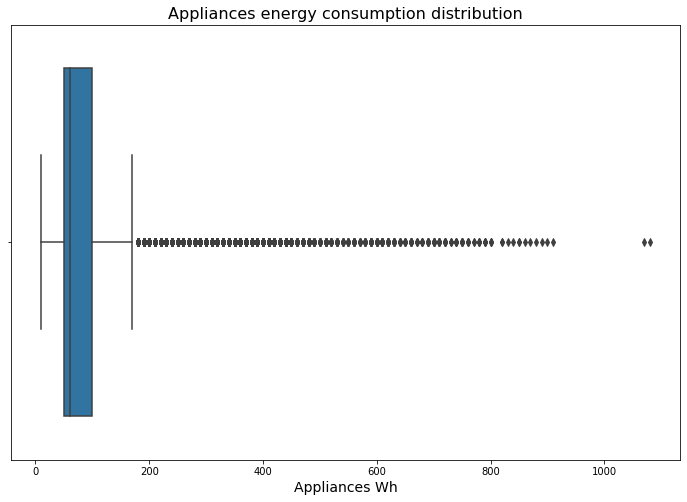

In [23]:
# finding the outliers
sorted_appliances = df.sort_values('Appliances', ascending = False)
print("The number of the 0, 1% top values of appliances' load is",
      len(sorted_appliances.head(len(sorted_appliances)//1000)),
      "and they have power load higher than", sorted_appliances.Appliances[19],
      "Wh")

#boxplot for appliances energy consumption
plt.figure(figsize =(12,8))
sns.boxplot(x='Appliances', data=df)
plt.xlabel('Appliances Wh', fontsize=14)
plt.title('Appliances energy consumption distribution', fontsize=16)

In [24]:
#removel of outliers
drop_df = df.drop(df[(df.Appliances>790)|(df.Appliances<0)].index)
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19718 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19718 non-null  int64  
 1   lights       19718 non-null  int64  
 2   T1           19718 non-null  float64
 3   RH_1         19718 non-null  float64
 4   T2           19718 non-null  float64
 5   RH_2         19718 non-null  float64
 6   T3           19718 non-null  float64
 7   RH_3         19718 non-null  float64
 8   T4           19718 non-null  float64
 9   RH_4         19718 non-null  float64
 10  T5           19718 non-null  float64
 11  RH_5         19718 non-null  float64
 12  T6           19718 non-null  float64
 13  RH_6         19718 non-null  float64
 14  T7           19718 non-null  float64
 15  RH_7         19718 non-null  float64
 16  T8           19718 non-null  float64
 17  RH_8         19718 non-null  float64
 18  T9         

In [25]:
drop_df = drop_df.drop('Month', axis=1)
drop_df = drop_df.drop('Weekday', axis=1)
drop_df = drop_df.drop('Week', axis=1)

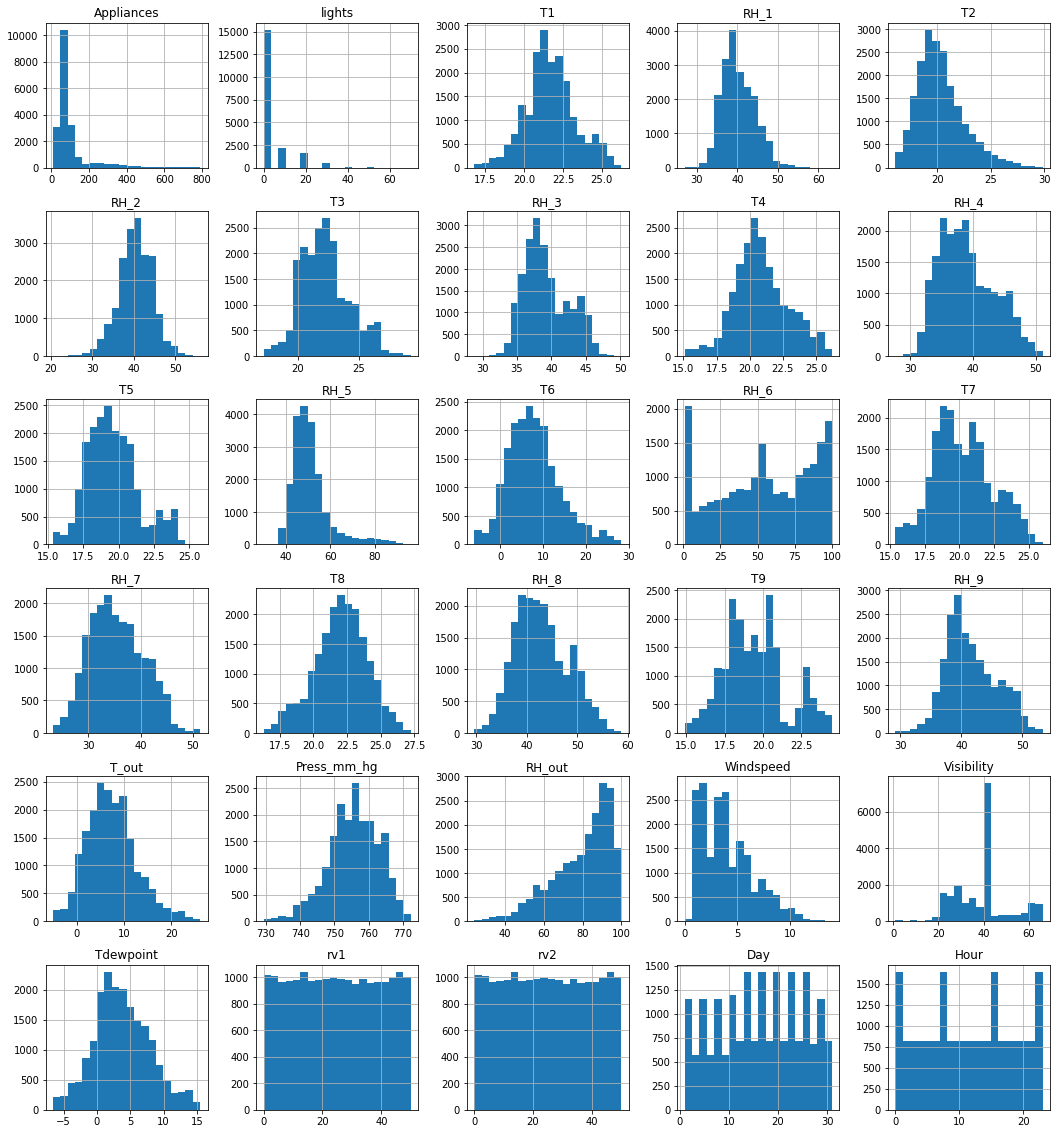

In [26]:
# hist of all the features to undrstand the distribution
drop_df.hist(bins = 20, figsize = (18,20));

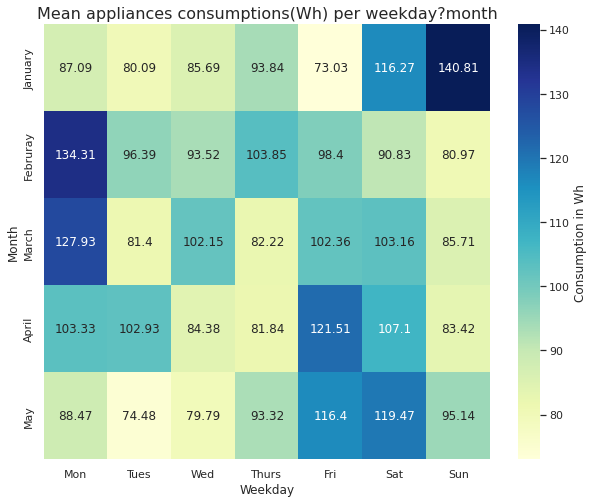

In [27]:
# heatmap mean applianceconsumption per weekday of month
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.heatmap(monthly_daily('Appliances').T,cmap='YlGnBu',
                 xticklabels= 'Mon Tues Wed Thurs Fri Sat Sun'.split(),
                 yticklabels= 'January Februray March April May'.split(),
                 annot=True, fmt='g',
                 cbar_kws= {'label': 'Consumption in Wh'}).set_title('Mean appliances consumptions(Wh) per weekday?month').set_fontsize('16')
plt.show()

In [28]:
# correlation matrix of all the attributes
drop_df.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Day,Hour
Appliances,1.000000,0.198201,0.058996,0.087890,0.122590,-0.058680,0.088211,0.037644,0.043280,0.017365,...,0.102671,-0.039059,-0.155689,0.090528,-0.004157,0.017180,-0.012404,-0.012404,-0.000418,0.219468
lights,0.198201,1.000000,-0.022727,0.107266,-0.004990,0.051428,-0.096397,0.131253,-0.008049,0.115113,...,-0.073683,-0.011491,0.068215,0.060741,0.019347,-0.035632,0.000627,0.000627,-0.042234,0.255219
T1,0.058996,-0.022727,1.000000,0.163976,0.836827,-0.002565,0.892423,-0.028357,0.876984,0.098001,...,0.682862,-0.149993,-0.345160,-0.087680,-0.075679,0.571435,-0.006107,-0.006107,-0.127037,0.178995
RH_1,0.087890,0.107266,0.163976,1.000000,0.269801,0.797675,0.253182,0.844803,0.105981,0.880435,...,0.340586,-0.293908,0.274344,0.204946,-0.020756,0.639078,-0.000530,-0.000530,-0.041459,0.018695
T2,0.122590,-0.004990,0.836827,0.269801,1.000000,-0.165586,0.735194,0.121740,0.761939,0.231678,...,0.792340,-0.132719,-0.505242,0.052724,-0.069587,0.582594,-0.010844,-0.010844,-0.157141,0.254971
RH_2,-0.058680,0.051428,-0.002565,0.797675,-0.165586,1.000000,0.137318,0.678418,-0.047445,0.721560,...,0.033439,-0.255419,0.585199,0.068929,-0.004746,0.499169,0.006183,0.006183,0.037354,-0.183140
T3,0.088211,-0.096397,0.892423,0.253182,0.735194,0.137318,1.000000,-0.011087,0.852852,0.122852,...,0.699277,-0.189364,-0.281216,-0.101017,-0.101767,0.645966,-0.005355,-0.005355,-0.077204,0.037630
RH_3,0.037644,0.131253,-0.028357,0.844803,0.121740,0.678418,-0.011087,1.000000,-0.140469,0.899024,...,0.118229,-0.233397,0.356199,0.263070,0.017251,0.414461,-0.000403,-0.000403,-0.048443,-0.052265
T4,0.043280,-0.008049,0.876984,0.105981,0.761939,-0.047445,0.852852,-0.140469,1.000000,-0.048743,...,0.663333,-0.074852,-0.388413,-0.185935,-0.104360,0.519326,-0.001759,-0.001759,-0.121880,0.088623
RH_4,0.017365,0.115113,0.098001,0.880435,0.231678,0.721560,0.122852,0.899024,-0.048743,1.000000,...,0.293228,-0.250814,0.336899,0.300231,0.002871,0.616532,-0.001736,-0.001736,-0.005483,-0.018885


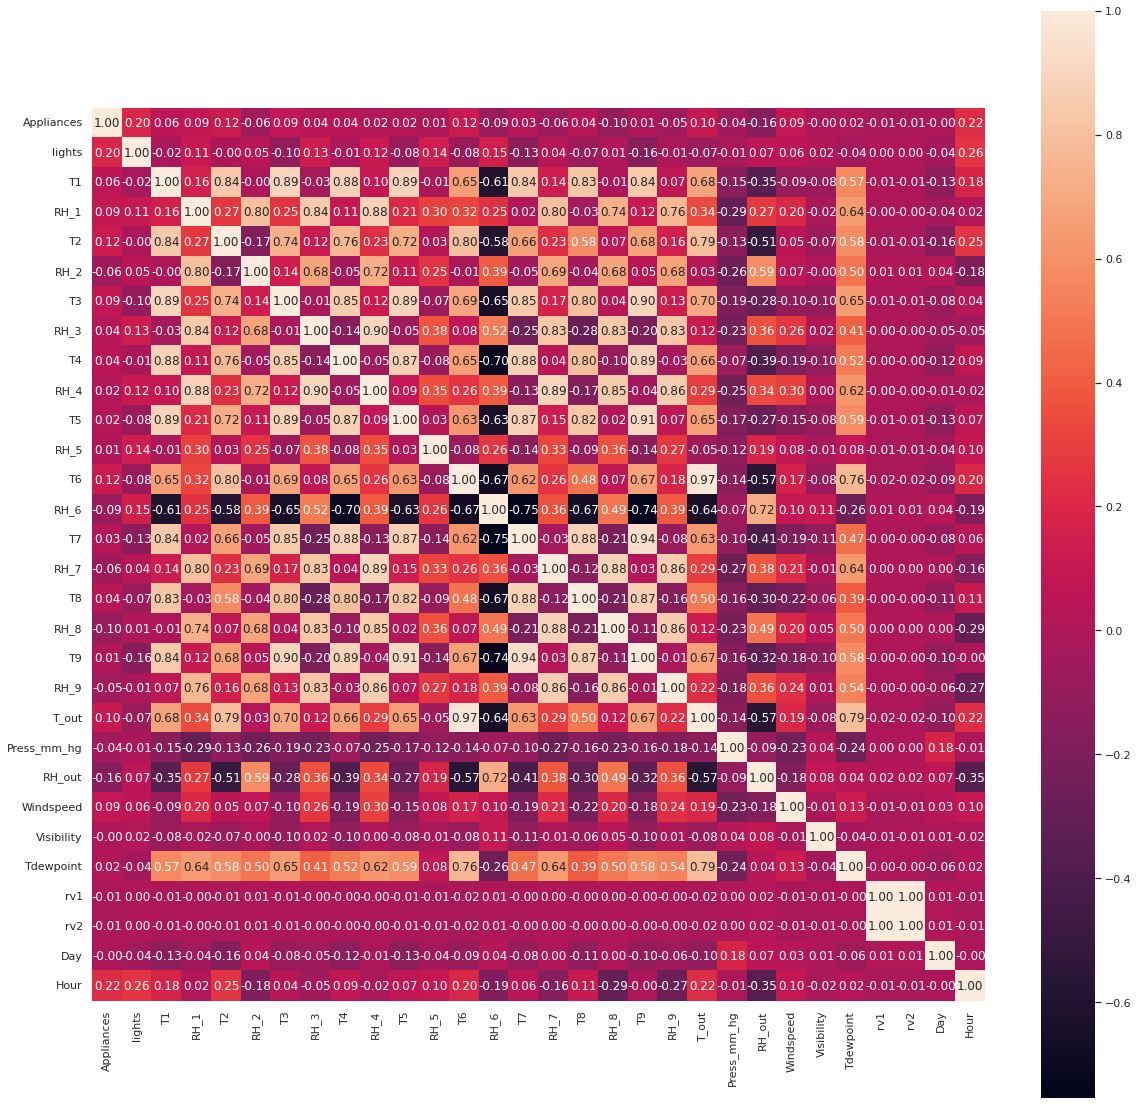

In [29]:
# plotting correlation matrix
corr = drop_df.corr()
plt.figure(figsize = (20,20))
sns.set(font_scale = 1)
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f')
plt.show()

In [30]:
# checking the multicollinearity

def redundant_pairs(energy):
  ''' Get diagonal and lower tringular pairs of correlation matrix'''
  pairs_to_drop = set()
  colms = df.columns
  for i in range(0, df.shape[1]):
    for j in range(0, i+1):
      pairs_to_drop.add((colms[i], colms[j]))
  return pairs_to_drop

# function to get top correlations

def top_abs_corre(df, n=5):
  au_corr = df.corr().abs().unstack()
  labels_drop = redundant_pairs(df)
  au_corr = au_corr.drop(labels = labels_drop).sort_values(ascending=False)
  return au_corr[0:n]

print('Top Absolute Correlations')
print(top_abs_corre(df, 40))

Top Absolute Correlations
rv1    rv2      1.000000
Month  Week     0.977385
T6     T_out    0.974787
T7     T9       0.944776
T5     T9       0.911055
T3     T9       0.901324
RH_3   RH_4     0.898978
RH_4   RH_7     0.894301
T1     T3       0.892402
T9     Month    0.890605
T4     T9       0.889439
T9     Week     0.888777
T3     T5       0.888169
T1     T5       0.885247
RH_7   RH_8     0.883984
T7     T8       0.882123
RH_1   RH_4     0.880359
T4     T7       0.877763
T1     T4       0.877001
T4     T5       0.871813
T5     T7       0.870624
T8     T9       0.869338
RH_7   RH_9     0.858686
RH_4   RH_9     0.856591
RH_8   RH_9     0.855812
T3     T4       0.852778
       T7       0.847374
RH_4   RH_8     0.847259
T1     T9       0.844777
RH_1   RH_3     0.844677
T1     T7       0.838705
       T2       0.836834
T7     Week     0.835119
RH_3   RH_9     0.833538
T7     Month    0.833005
RH_3   RH_7     0.832685
       RH_8     0.828822
T1     T8       0.825413
T5     T8       0.824981

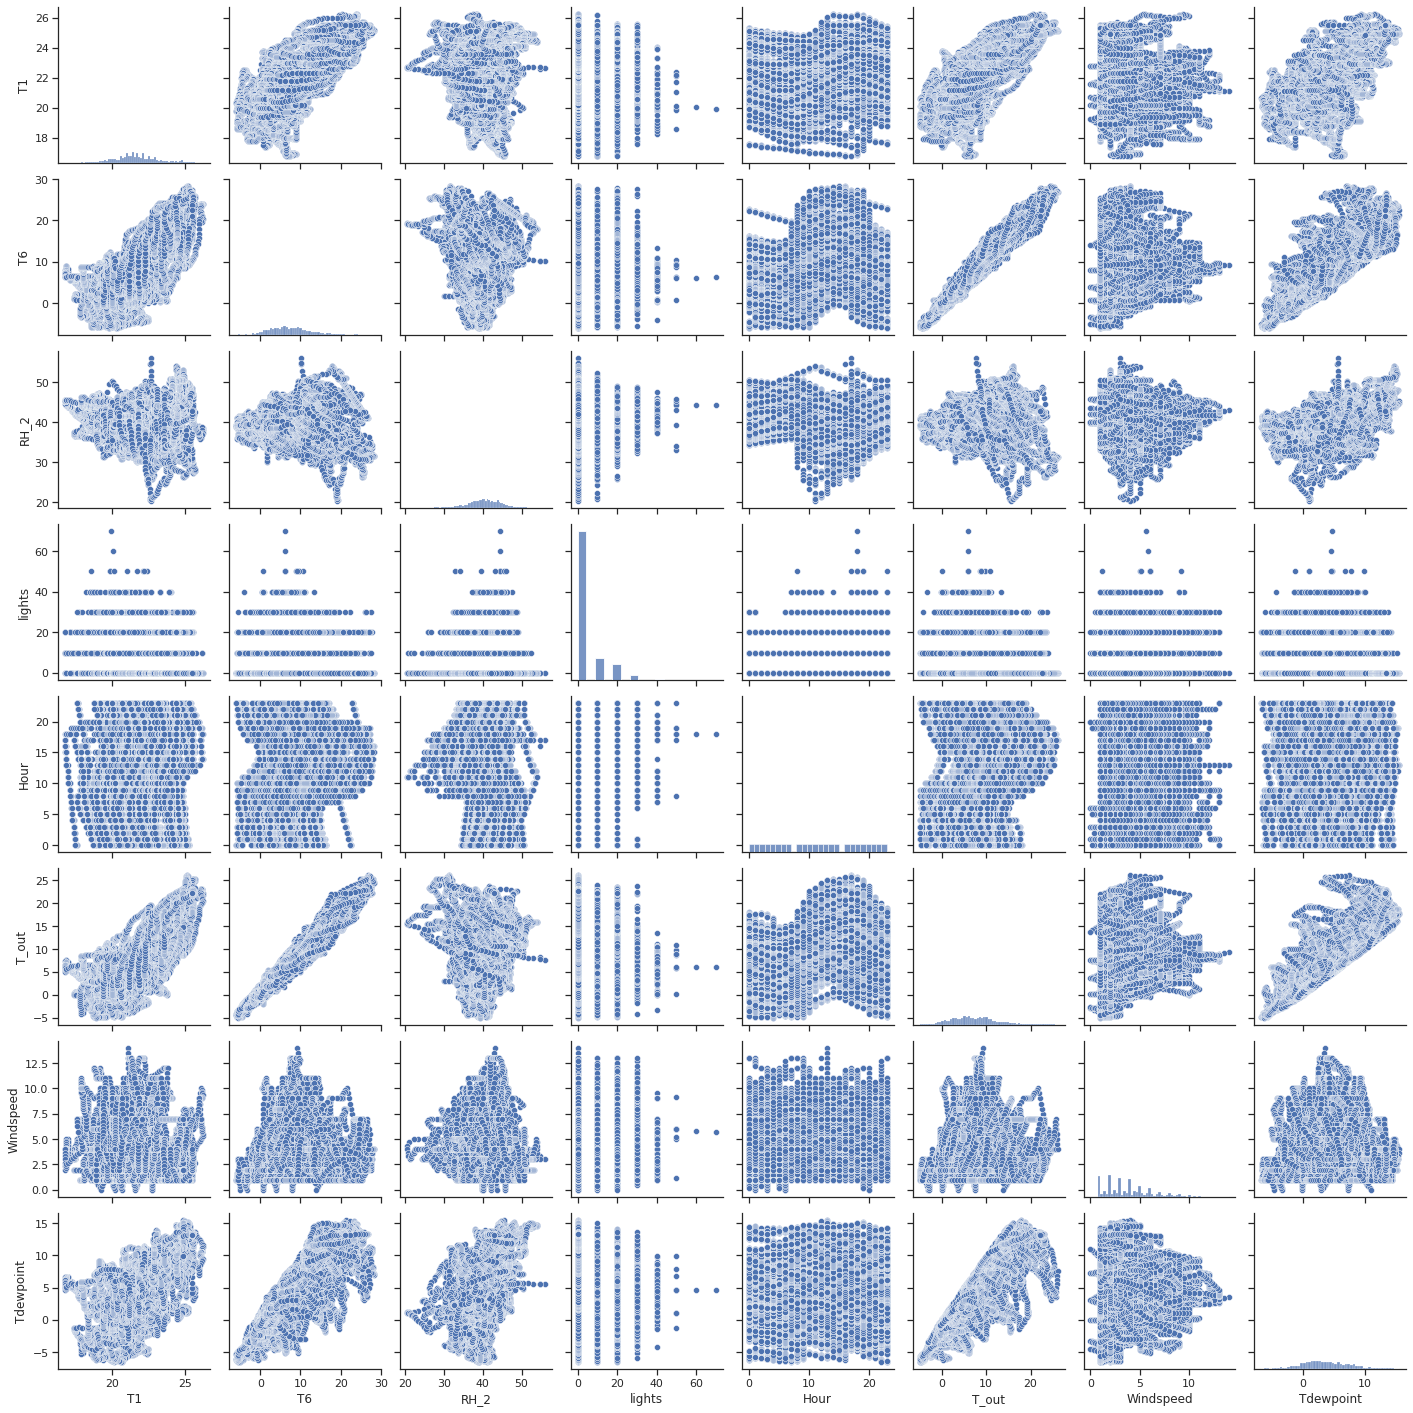

In [31]:
col = ['T1', 'T6', 'RH_2', 'lights', 'Hour', 'T_out', 'Windspeed', 'Tdewpoint']
sns.set(style = 'ticks', color_codes=True)
sns.pairplot(drop_df[col])
plt.show();

In [32]:
# managing the column
temperature = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']
humidity = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']
weather = ['T_out', 'Tdewpoint', 'RH_out', 'Press_mm_hg', 'Windspeed', 'Visibility']
lights = ['lights']
hour = ['Hour']
ramdom = ['rv1', 'rv2']
appliance = ['Appliances']
app_class = ['Appliances_class']

In [33]:
feature = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'Tdewpoint', 'RH_out', 'Press_mm_hg', 'Windspeed', 'lights']
feature_1 = drop_df[feature]
target_1 = drop_df[appliance]

In [34]:
feature_1.head()

,T1,T2,T3,T4,T5,T6,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,Tdewpoint,RH_out,Press_mm_hg,Windspeed,lights
date,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,19.89,19.2,19.79,19.000000,17.166667,7.026667,47.596667,44.790000,44.730000,45.566667,55.20,84.256667,5.3,92.0,733.5,7.000000,30
2016-01-11 17:10:00,19.89,19.2,19.79,19.000000,17.166667,6.833333,46.693333,44.722500,44.790000,45.992500,55.20,84.063333,5.2,92.0,733.6,6.666667,30
2016-01-11 17:20:00,19.89,19.2,19.79,18.926667,17.166667,6.560000,46.300000,44.626667,44.933333,45.890000,55.09,83.156667,5.1,92.0,733.7,6.333333,30
2016-01-11 17:30:00,19.89,19.2,19.79,18.890000,17.166667,6.433333,46.066667,44.590000,45.000000,45.723333,55.09,83.423333,5.0,92.0,733.8,6.000000,40
2016-01-11 17:40:00,19.89,19.2,19.79,18.890000,17.200000,6.366667,46.333333,44.530000,45.000000,45.530000,55.09,84.893333,4.9,92.0,733.9,5.666667,40


In [35]:
x1_train, x1_test, y1_train, y1_test = train_test_split(feature_1, target_1, test_size = 0.2, random_state = 0)

In [36]:
# scaling the data
scaler = StandardScaler()

x1_train = scaler.fit_transform(x1_train)
x1_test = scaler.transform(x1_test)
y1_train = scaler.fit_transform(y1_train)
y1_test = scaler.transform(y1_test)

In [37]:
# cost function
def costfuct(datafile, datatarget, coeffmatrix):
  datalength  = len(datafile);
  costvalue = np.sum(((datafile.dot(coeffmatrix.T)) - datatarget) ** 2) / (2 * datalength);
  return costvalue;

In [55]:
# gradient descent function for fixed threshold

from numpy.lib.function_base import gradient
def gradientdescent(datafile, datatarget, coeffmatrix, alpha, iterations):
  costhistory = [0] * iterations;
  datalength = len(datatarget);
  for i in range(iterations):
    loss = datafile.dot(coeffmatrix.T) - datatarget;
    gradient = datafile.T.dot(loss) / datalength;
    coeffmatrix = coeffmatrix - (alpha * gradient.T);
    costvalue = costfuct(datafile, datatarget, coeffmatrix);
    costhistory[i] = costvalue;
  list1 = [0.0000001];
  cost1 = []

  for k in list1:
    for j in range(len(costhistory) - 1):
      a = abs(costhistory[j] - costhistory[j+1])
      if a <= k:
        print('Threshold level', k, '\n')
        print('Cost Function converges at', j, '\n')
        print('Model Cost', costhistory[j], '\n')
        break
    cost1.append(costhistory[j])
    print('Model Coefficients: ')
    print(coeffmatrix);
  print('alpha:', alpha);
  plt.plot(costhistory)
  plt.xlabel('Numbers of iterations')
  plt.ylabel('Cost')
  plt.show()
  return coeffmatrix, costhistory

In [58]:
# linear regression function

def devlinearmodel(datafile, datatarget):
  list2 = [0.2, 0.1, 0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005];
  for learning_rate in list2:
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, learning_rate, 50000);

In [40]:
# predict

def predict(testdata, coeffmatrix):
  predictedtarget = testdata.dot(coeffmatrix.T);
  return predictedtarget;


In [41]:
# MSE
def calcMSE(testtarget, predictedtarget):
  modelRSME = (sum((testtarget - predictedtarget) ** 2) / len(testtarget));
  return modelRSME;

In [43]:
# R-square
def modelRsquared(testtarget, predictedtarget):
  targetmean = np.mean(testtarget);
  totalSSE = np.sum((testtarget - targetmean) ** 2);
  residualSSE = np.sum((testtarget - predictedtarget) **2);
  rSquared = 1 - (residualSSE / totalSSE);
  return rSquared;

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5 

Threshold level 1e-07 

Cost Function converges at 949 

Model Cost 0.4283398522552198 

Model Coefficients: 
[[ 0.15559748 -0.36423316  0.40725151 -0.21805076 -0.08016162  0.27758989
   0.6893608  -0.52721509  0.03208813 -0.21864014  0.0153384   0.02300359
  -0.22548569  0.04598724  0.0094354   0.04087295  0.20643612]]
alpha: 0.2


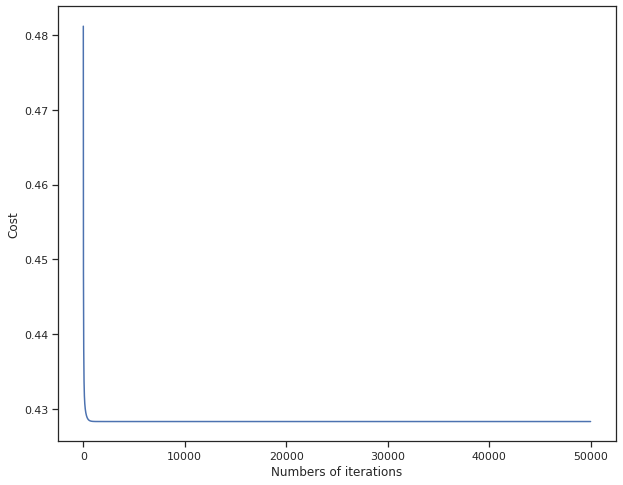

In [56]:
# model train for alpha = 0.1
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.2, 50000);
    return coeffmatrix;
linearmodel_tr1 = devlinearmodel(x1_train, y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5 

Threshold level 1e-07 

Cost Function converges at 1670 

Model Cost 0.42835649869031517 

Model Coefficients: 
[[ 0.15559748 -0.36423316  0.40725151 -0.21805076 -0.08016162  0.27758989
   0.6893608  -0.52721509  0.03208813 -0.21864014  0.0153384   0.02300359
  -0.22548569  0.04598724  0.0094354   0.04087295  0.20643612]]
alpha: 0.1


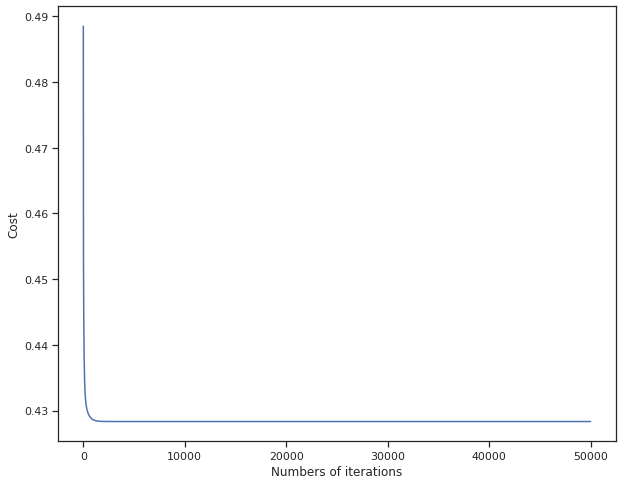

In [57]:
# model train for alpha = 0.1
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.1, 50000);
    return coeffmatrix;
linearmodel_tr2 = devlinearmodel(x1_train, y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5 

Threshold level 1e-07 

Cost Function converges at 9095 

Model Cost 0.4286539599978343 

Model Coefficients: 
[[ 0.15543703 -0.36397003  0.40727274 -0.21807978 -0.08016989  0.27741976
   0.68921594 -0.52702265  0.03207858 -0.21868968  0.01533636  0.02300919
  -0.2253739   0.04589768  0.00943405  0.04087216  0.2064437 ]]
alpha: 0.01


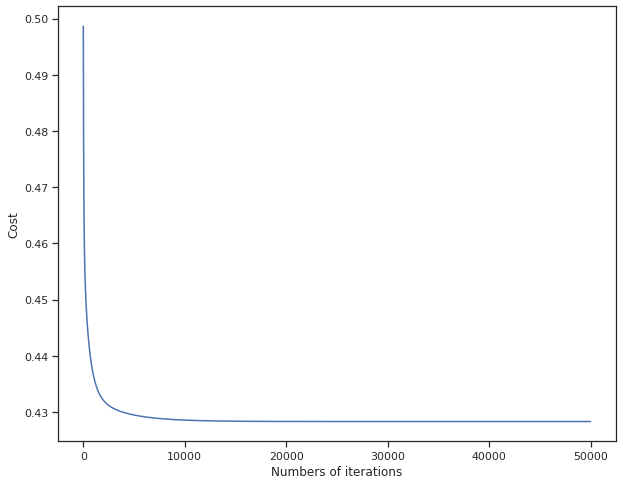

In [59]:
# model train for alpha = 0.01
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.01, 50000);
    return coeffmatrix;
linearmodel_tr3 = devlinearmodel(x1_train, y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5 

Threshold level 1e-07 

Cost Function converges at 13689 

Model Cost 0.42897820210573434 

Model Coefficients: 
[[ 0.14877362 -0.35298728  0.40814268 -0.219285   -0.08051568  0.2706115
   0.68312006 -0.51891501  0.03169797 -0.22076859  0.0152544   0.02326532
  -0.22095437  0.04230056  0.00938533  0.04085098  0.20675966]]
alpha: 0.005


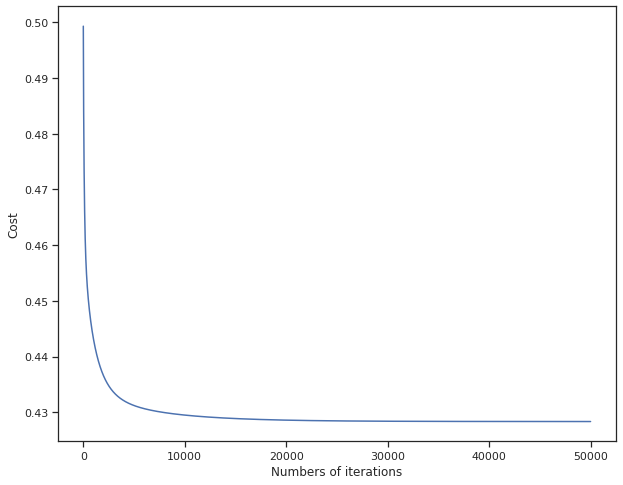

In [60]:
# model train for alpha = 0.005
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.005, 50000);
    return coeffmatrix;
linearmodel_tr4 = devlinearmodel(x1_train, y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4128407216503367 

Threshold level 1e-07 

Cost Function converges at 912 

Model Cost 0.3534201546664343 

Model Coefficients: 
[[ 0.19350609 -0.39457914  0.33185429 -0.19743606 -0.08093889  0.31641486
   0.58044687 -0.44379558  0.03172778 -0.1685573   0.03373587 -0.0200464
  -0.22443939  0.04995539 -0.00445827  0.02699874  0.20087152]]
alpha: 0.2


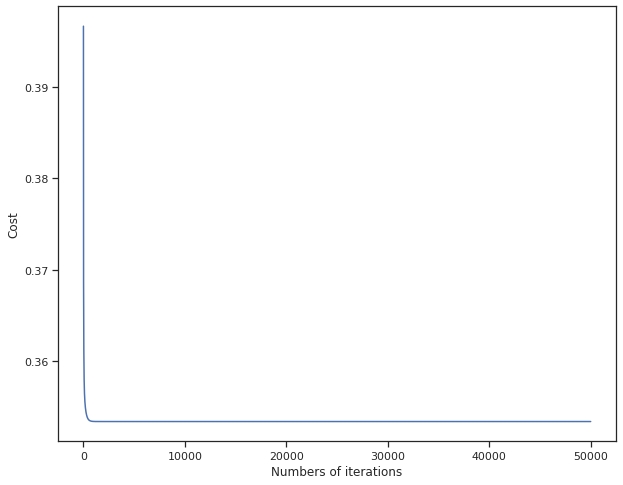

In [61]:
# model test for alpha = 0.2
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.2, 50000);
    return coeffmatrix;
linearmodel_te1 = devlinearmodel(x1_test, y1_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4128407216503367 

Threshold level 1e-07 

Cost Function converges at 1607 

Model Cost 0.3534359815669455 

Model Coefficients: 
[[ 0.19350609 -0.39457914  0.33185429 -0.19743606 -0.08093889  0.31641486
   0.58044687 -0.44379558  0.03172778 -0.1685573   0.03373587 -0.0200464
  -0.22443939  0.04995539 -0.00445827  0.02699874  0.20087152]]
alpha: 0.1


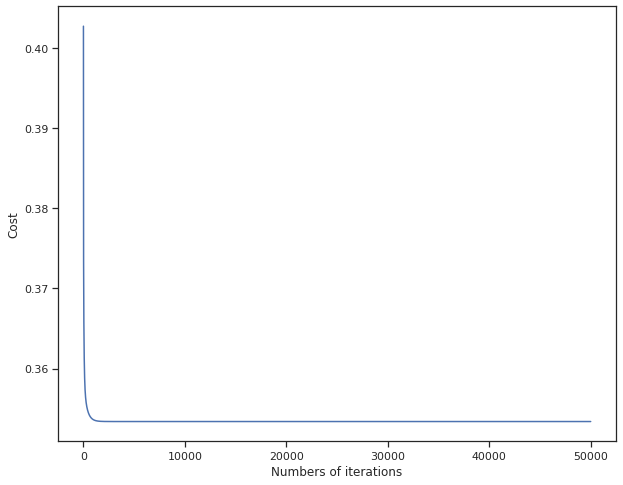

In [62]:
# model test for alpha = 0.1
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.1, 50000);
    return coeffmatrix;
linearmodel_te2 = devlinearmodel(x1_test, y1_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4128407216503367 

Threshold level 1e-07 

Cost Function converges at 8777 

Model Cost 0.3537213824348875 

Model Coefficients: 
[[ 0.19339874 -0.39439876  0.33186961 -0.19745566 -0.08094932  0.31630279
   0.58035075 -0.44366215  0.03171907 -0.16859217  0.0337347  -0.02004285
  -0.22436798  0.04989584 -0.0044603   0.02699757  0.20087736]]
alpha: 0.01


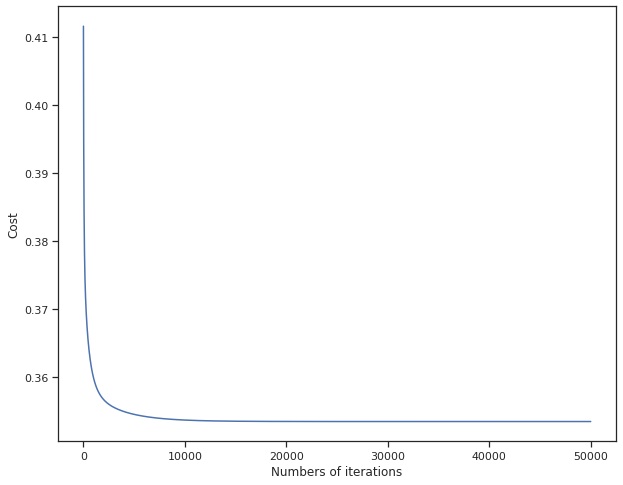

In [63]:
# model test for alpha = 0.01
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.01, 50000);
    return coeffmatrix;
linearmodel_te3 = devlinearmodel(x1_test, y1_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4128407216503367 

Threshold level 1e-07 

Cost Function converges at 13210 

Model Cost 0.3540344685752189 

Model Coefficients: 
[[ 0.18802689 -0.38535547  0.33263277 -0.19843466 -0.08147188  0.31078818
   0.57551655 -0.43694745  0.03128939 -0.1703459   0.03367715 -0.01985653
  -0.2208762   0.04696083 -0.00455896  0.02694334  0.20117008]]
alpha: 0.005


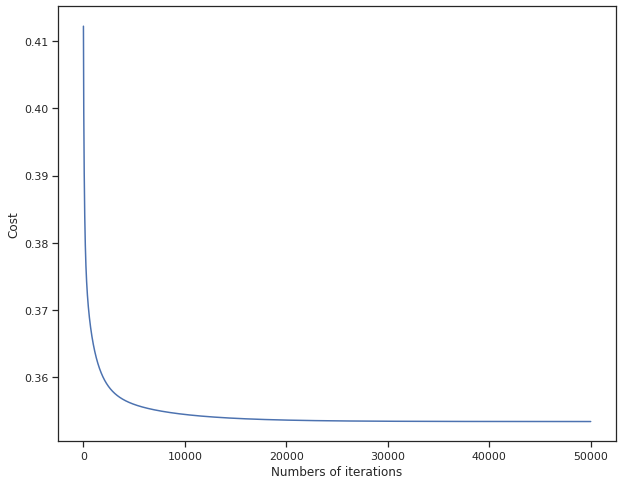

In [64]:
# model test for alpha = 0.005
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.005, 50000);
    return coeffmatrix;
linearmodel_te4 = devlinearmodel(x1_test, y1_test)

In [68]:
reg = linear_model.LinearRegression()
# train the model using train sets
reg.fit(x1_train, y1_train)
# regression corfficients
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [[ 0.15559748 -0.36423316  0.40725151 -0.21805076 -0.08016162  0.27758989
   0.6893608  -0.52721509  0.03208813 -0.21864014  0.0153384   0.02300359
  -0.22548569  0.04598724  0.0094354   0.04087295  0.20643612]]


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5 

Threshold level 1e-07 

Cost Function converges at 949 

Model Cost 0.4283398522552198 

Model Coefficients: 
[[ 0.15559748 -0.36423316  0.40725151 -0.21805076 -0.08016162  0.27758989
   0.6893608  -0.52721509  0.03208813 -0.21864014  0.0153384   0.02300359
  -0.22548569  0.04598724  0.0094354   0.04087295  0.20643612]]
alpha: 0.2


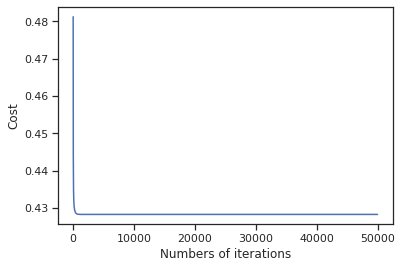

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4128407216503367 

Threshold level 1e-07 

Cost Function converges at 912 

Model Cost 0.3534201546664343 

Model Coefficients: 
[[ 0.19350609 -0.39457914  0.33185429 -0.19743606 -0.08093889  0.31641486
   0.58044687 -0.44379558  0.03172778 -0.1685573   0.03373587 -0.0200464
  -0.22443939  0.04995539 -0.00445827  0.02699874  0.20087152]]
alpha: 0.2


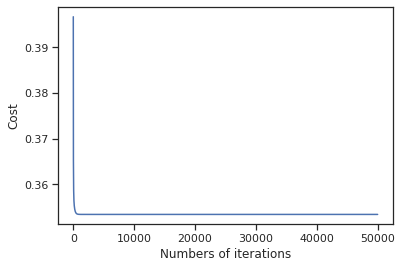

In [70]:
# linear regression for best alpha value
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.2, 50000);
    return coeffmatrix;
    
linearmodel_trbe = devlinearmodel(x1_train, y1_train)
linearmodel_tebe = devlinearmodel(x1_test, y1_test)

In [80]:
predictedtarget_tr1 = predict(x1_train, linearmodel_tr1)
predictedtarget_tr2 = predict(x1_train, linearmodel_tr2)
predictedtarget_tr3 = predict(x1_train, linearmodel_tr3)
predictedtarget_tr4 = predict(x1_train, linearmodel_tr4)

modelMSE_tr1 = calcMSE(y1_train, predictedtarget_tr1)
modelMSE_tr2 = calcMSE(y1_train, predictedtarget_tr2)
modelMSE_tr3 = calcMSE(y1_train, predictedtarget_tr3)
modelMSE_tr4 = calcMSE(y1_train, predictedtarget_tr4)

In [82]:
print ('Model MSE Train1 alpha 0.2:', modelMSE_tr1, '\n')
print ('Model MSE Train2 alpha 0.1:', modelMSE_tr2, '\n')
print ('Model MSE Train3 alpha 0.01:', modelMSE_tr3, '\n')
print ('Model MSE Train4 alpha 0.005:', modelMSE_tr4, '\n')

Model MSE Train1 alpha 0.2: [0.85664635] 

Model MSE Train2 alpha 0.1: [0.85664635] 

Model MSE Train3 alpha 0.01: [0.85664635] 

Model MSE Train4 alpha 0.005: [0.85665191] 



In [77]:
predictedtarget_te1 = predict(x1_test, linearmodel_te1)
predictedtarget_te2 = predict(x1_test, linearmodel_te2)
predictedtarget_te3 = predict(x1_test, linearmodel_te3)
predictedtarget_te4 = predict(x1_test, linearmodel_te4)

modelMSE_te1 = calcMSE(y1_test, predictedtarget_te1)
modelMSE_te2 = calcMSE(y1_test, predictedtarget_te2)
modelMSE_te3 = calcMSE(y1_test, predictedtarget_te3)
modelMSE_te4 = calcMSE(y1_test, predictedtarget_te4)

In [83]:
print ('Model MSE Test1 alpha 0.2:', modelMSE_te1, '\n')
print ('Model MSE Test2 alpha 0.1:', modelMSE_te2, '\n')
print ('Model MSE Test3 alpha 0.01:', modelMSE_te3, '\n')
print ('Model MSE Test4 alpha 0.005:', modelMSE_te4, '\n')

Model MSE Test1 alpha 0.2: [0.7068085] 

Model MSE Test2 alpha 0.1: [0.7068085] 

Model MSE Test3 alpha 0.01: [0.7068085] 

Model MSE Test4 alpha 0.005: [0.70681236] 



In [84]:
modelR1_tr1 = modelRsquared(y1_train, predictedtarget_tr1)
modelR1_tr2 = modelRsquared(y1_train, predictedtarget_tr2)
modelR1_tr3 = modelRsquared(y1_train, predictedtarget_tr3)
modelR1_tr4 = modelRsquared(y1_train, predictedtarget_tr4)

In [87]:
print('Model R-Squared Training:', '\n', modelR1_tr1, '\n', modelR1_tr2, '\n', modelR1_tr3, '\n', modelR1_tr4, '\n')

Model R-Squared Training: 
 0.14335364969173814 
 0.14335364969173814 
 0.1433536465978672 
 0.1433480885485865 



In [85]:
modelR1_te1 = modelRsquared(y1_test, predictedtarget_te1)
modelR1_te2 = modelRsquared(y1_test, predictedtarget_te2)
modelR1_te3 = modelRsquared(y1_test, predictedtarget_te3)
modelR1_te4 = modelRsquared(y1_test, predictedtarget_te4)

In [89]:
print('Model R-Squared Testing:', '\n', modelR1_te1, '\n', modelR1_te2, '\n', modelR1_te3, '\n', modelR1_te4, '\n')

Model R-Squared Testing: 
 0.14179755593582466 
 0.14179755593582466 
 0.14179755413419715 
 0.14179287794396722 

